# F1 스코어

![f1스코어](https://wikimedia.org/api/rest_v1/media/math/render/svg/1bf179c30b00db201ce1895d88fe2915d58e6bfd?raw=True)
- A 예측 모델 : 정밀도 0.9, 재현율 0.1 - 극단적 차이
- B 예측 모델 : 정밀도 0.5, 재현율 0.5
- A 모델의 F1 스코어 - 0.18
- B 모델의 F1 스코어 - 0.5

### 사이킷런 : **f1_score()** API

In [12]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from Evaluation_titanic import x_train, y_train, x_test, y_test
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))
    
lr_clf = LogisticRegression()    
lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
get_clf_eval(y_test, pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어: {0:.4f})'.format(f1))

F1 스코어: 0.7966)


In [14]:
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임곗값:", custom_threshold)
        get_clf_eval(y_test, custom_predict)

### 임계값을 변화시키며 F1스코어

In [15]:
from sklearn.preprocessing import Binarizer

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    # F1 스코어 추가
    f1 = f1_score(y_test, pred)
    
    print('오차 행렬')
    print(confusion)
    # f1 스코어 print 추가 
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'
          .format(accuracy, precision, recall, f1))

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(x_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1:0.7576
임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869, F1:0.7869
임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1:0.7966
임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377, F1:0.7965
임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213, F1:0.8000


### - 임계값 0.6일 때가 F1 스코어가 제일 크나 재현율이 낮아짐 -  주의 

.

# ROC curve와 AUC

- ROC 곡선은 FPR(False Positive Rate)가 변할 때, TPR(Ture Positive Rate)의 변화
- 민감도(TPR)은 실제값 양성이 정확히 예측되는 수준 (질병이 있는 사람을 있다고 판정)
- 특이성(TNR)은 실제값 음성이 정확히 예측되는 수준 (질별이 없는 사람을 없다고 판정)
- FPR = FP / (FP + TN) = 1 - TNR = 1 - 특이성
![f1스코어](https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg?raw=True)

![f1스코어](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6b/Roccurves.png/330px-Roccurves.png?raw=True)
- 왼쪽 하단과 오른쪽 상단을 대각선으로 이은 직선은 랜덤(0.5) 수준의 이진 분류의 ROC직선임.(AUC:0.5)
- FPR을 1로 만드려면 TN을 0으로 만들면 됨 (분류 결정 임곗값을 0으로 지정) - 다 Positive로 예측
- 따라서 분류 결정 임곗값을 0-1까지 변화시키면서 FPR값의 변호를 구하는 것이 ROC curve임


In [18]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(x_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
#반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출
thr_index = np.arange(0, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index], 2))

# 5step 단위로 추출된 임계값에 따른 FPR, TPR값
print('샘플 임곗값별 FPR:', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR:', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index 10개: [ 0  5 10 15 20 25 30 35 40 45]
샘플용 10개의 임곗값: [1.94 0.87 0.63 0.55 0.44 0.32 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR: [0.    0.008 0.025 0.059 0.127 0.203 0.559 0.602 0.695 0.847]
샘플 임곗값별 TPR: [0.    0.246 0.672 0.738 0.787 0.885 0.902 0.951 0.967 0.984]


### ROC 결과 값 분석
- 임곗값이 1에 가까운 값에서 작아지면 FPR은 점점 커지고 TPR은 가파르게 커짐

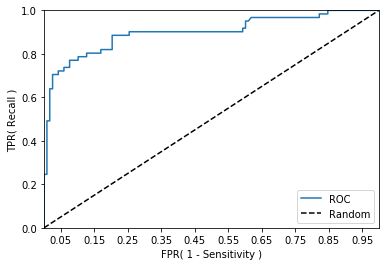

In [23]:
import matplotlib.pyplot as plt

def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR값을 반환받음.
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
    # ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1], 'k--', label='Random')
    
    # FPR X축의 scale을 0.1단위로 변경, X, Y축 명 설정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:,1])

# AUC (Area Under Curve)
- ROC 곡선의 및 면적을 구하는 건데, 1에 가까울 수록 좋은 임계값임
- Random일 때는 AUC는 0.5임

In [24]:
from sklearn.metrics import roc_auc_score

pred = lr_clf.predict(x_test)
roc_score = roc_auc_score(y_test, pred)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.8429
